# Feature Scaling - Mandatory Step in Deep Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


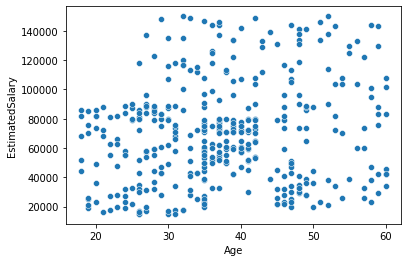

In [5]:
sns.scatterplot(df.iloc[:,0], df.iloc[:,1])
plt.show()

In [6]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [7]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [13]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 5s 23ms/step - loss: 972.7393 - accuracy: 0.4469 - val_loss: 727.0072 - val_accuracy: 0.6750
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 462.4453 - accuracy: 0.5469 - val_loss: 426.6657 - val_accuracy: 0.3250
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 191.6282 - accuracy: 0.4969 - val_loss: 28.8925 - val_accuracy: 0.3250
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 56.7290 - accuracy: 0.4688 - val_loss: 54.5102 - val_accuracy: 0.3250
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 47.9241 - accuracy: 0.4906 - val_loss: 0.7912 - val_accuracy: 0.3750
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 37.8229 - accuracy: 0.4563 - val_loss: 86.8493 - val_accuracy: 0.6750
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 32.9150 - accuracy: 0.4969 - val_loss: 7.4583 - val_accuracy: 0.

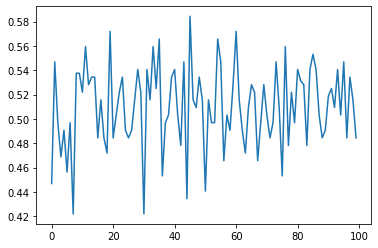

In [18]:
plt.plot(history.history['accuracy'])

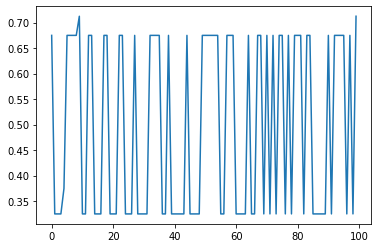

In [19]:
plt.plot(history.history['val_accuracy'])

# Applying Feature Scaling method

In [21]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.fit_transform(x_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


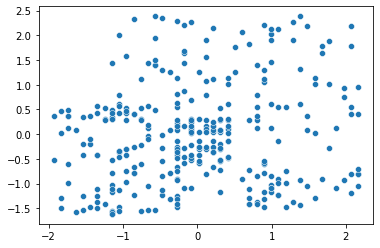

In [24]:
sns.scatterplot(x_train_scaler[:,0], x_train_scaler[:,1])
plt.show()

In [25]:
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim=2))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model1.fit(x_train_scaler, y_train, validation_data=(x_test_scaler, y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 0.6609 - accuracy: 0.7625 - val_loss: 0.6266 - val_accuracy: 0.7500
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6098 - accuracy: 0.8000 - val_loss: 0.5767 - val_accuracy: 0.7625
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5641 - accuracy: 0.8125 - val_loss: 0.5358 - val_accuracy: 0.7625
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5291 - accuracy: 0.8219 - val_loss: 0.5003 - val_accuracy: 0.7750
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4983 - accuracy: 0.8375 - val_loss: 0.4689 - val_accuracy: 0.8125
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4715 - accuracy: 0.8469 - val_loss: 0.4407 - val_accuracy: 0.8250
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4475 - accuracy: 0.8500 - val_loss: 0.4157 - val_accuracy: 0.8250
Epoch 8/100


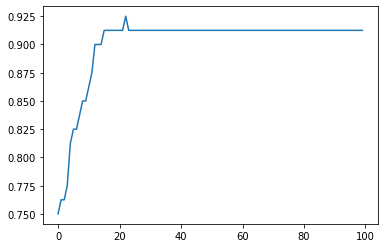

In [26]:
plt.plot(history.history['val_accuracy'])

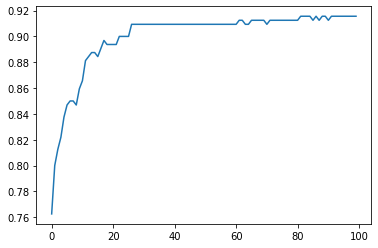

In [27]:
plt.plot(history.history['accuracy'])

# Dropout

In [29]:
from tensorflow.keras.layers import Dropout

In [31]:
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_dim=2))
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu', input_dim=2))
model2.add(Dropout(0.4))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model2.fit(x_train_scaler, y_train, validation_data=(x_test_scaler, y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 20ms/step - loss: 0.6284 - accuracy: 0.7531 - val_loss: 0.5528 - val_accuracy: 0.8250
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5248 - accuracy: 0.8250 - val_loss: 0.4593 - val_accuracy: 0.8375
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4500 - accuracy: 0.8375 - val_loss: 0.3865 - val_accuracy: 0.8500
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3952 - accuracy: 0.8500 - val_loss: 0.3357 - val_accuracy: 0.8625
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3663 - accuracy: 0.8531 - val_loss: 0.3025 - val_accuracy: 0.8625
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3198 - accuracy: 0.8531 - val_loss: 0.2790 - val_accuracy: 0.8750
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3215 - accuracy: 0.8656 - val_loss: 0.2615 - val_accuracy: 0.8750
Epoch 8/100
